In [1]:
import pandas as pd 

data = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Code/mitsa/gene/data/log2_expr.csv")
data.rename(columns={'Unnamed: 0': 'case_id'}, inplace=True)
data["type"] = data.iloc[:, 0].apply(lambda x: x.split('-')[0])
data["case_id"]= data["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))

In [1]:
import pandas as pd
signatures = pd.read_csv("gene/data/signatures.csv")
hugo_table = pd.read_csv("gene/data/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt", sep="\t")
hugo_table = hugo_table[["Hugo_Symbol", "Entrez_Gene_Id"]]
hugo_table = hugo_table.dropna(axis="rows", how="any")

In [39]:
# collect list of genes to look up
sel_genes = []
for col in signatures.columns:
    sel_genes.extend(signatures[col].to_list())
sel_genes = list(set(sel_genes))

sel_genes_entrez = [str(gene) for gene in hugo_table[hugo_table["Hugo_Symbol"].isin(sel_genes)]["Entrez_Gene_Id"] if str(gene) in data.columns]

In [47]:
# extract selected genes from data
sel_data = data[["type", "case_id"]+sel_genes_entrez]

# rename the entrez cols to gene names
sel_genes_names = [hugo_table[hugo_table["Entrez_Gene_Id"]==int(gene)]["Hugo_Symbol"].iloc[0] for gene in sel_genes_entrez]
columns_rename_dict = dict()
columns_rename_dict = {i: cid for i, cid in zip(sel_genes_entrez, sel_genes_names)}
sel_data.rename(columns=columns_rename_dict, inplace=True)
sel_data.to_csv("gene/data/selected_gene_data.csv", index=None)

/tmp/ipykernel_2196547/2452520472.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_data.rename(columns=columns_rename_dict, inplace=True)


In [2]:
type_case_df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv')
mitosis = pd.read_xml("/mnt/gpfs01/lsf-workspace/u2070124/Code/mitsa/gene/data/MITOSIS.v2023.2.Hs.xml")

In [3]:
gene_ids = [i for i, cid in enumerate(mitosis["MEMBERS_EZID"][0].split(",")) if cid in data.columns]
ezid = [mitosis["MEMBERS_EZID"][0].split(",")[gene_id] for gene_id in gene_ids]
ezid_names = [mitosis["MEMBERS_SYMBOLIZED"][0].split(",")[gene_id] for gene_id in gene_ids]


In [4]:

data["type"] = data.iloc[:, 0].apply(lambda x: x.split('-')[0])
data["type"].unique()

array(['UCEC', 'STAD', 'ESCA', 'MESO', 'UVM', 'CESC', 'TGCT', 'BRCA',
       'THYM', 'HNSC', 'LUSC', 'THCA', 'LAML', 'COADREAD', 'LIHC', 'SKCM',
       'KIRP', 'DLBC', 'PCPG', 'LGG', 'PAAD', 'GBM', 'KICH', 'UCS',
       'LUAD', 'SARC', 'KIRC', 'CHOL', 'PRAD', 'OV', 'BLCA', 'ACC'],
      dtype=object)

In [5]:
# replace the ezid of the genes with gene symbols
data = data[["type", "case_id"]+ezid]
columns_rename_dict = dict()
# for i, cid in enumerate(ezid):
#     print(i)
#     columns_rename_dict[cid] = ezid_names[i]
columns_rename_dict = {cid: ezid_names[i] for i, cid in enumerate(ezid)}
data.rename(columns=columns_rename_dict, inplace=True)

In [20]:
data["case_id"]= data["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))
data.to_csv(save_path+"all_cancers.csv", index=None)

In [18]:
import pandas as pd
save_path = "gene/data/mitosis_genes/"
# Assuming 'data' and 'type_case_df' are your dataframes
for type_name in type_case_df['type'].unique():
    # Use the mask to filter rows from 'data'
    sub_df = data[data["type"] == type_name]

    sub_df["case_id"]= sub_df["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))
    sub_df.drop(columns=["type"], inplace=True)
    # Save the sub-dataframe to a csv file
    sub_df.to_csv(save_path + f'{type_name}_mitosis.csv', index=False)


/tmp/ipykernel_2844871/4023293241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["case_id"]= sub_df["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))
/tmp/ipykernel_2844871/4023293241.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["type"], inplace=True)
/tmp/ipykernel_2844871/4023293241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [45]:
import pandas as pd

# Assuming 'data' and 'type_case_df' are your dataframes
for type_name in type_case_df['type'].unique()[:1]:
    # Get the case ids for the current type
    case_ids = type_case_df[type_case_df['type'] == type_name]['bcr_patient_barcode']

    # Create a boolean mask for rows in 'data' where the case id is in 'case_ids'
    mask = data.iloc[:, 0].apply(lambda x: '-'.join(x.split('-')[1:4]) in case_ids.values)

    # Use the mask to filter rows from 'data'
    sub_df = data[mask]

    # Save the sub-dataframe to a csv file
    sub_df.to_csv(f'{type_name}.csv', index=False)


In [2]:
import scipy.io

# Specify the path to the .mat file
file_path = "/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/nuclei_instances_datasets/NuClick/Validation/mat_files/CoNSeP_Test_test_11_0_0.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)

In [4]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'img', 'mask', 'others'])

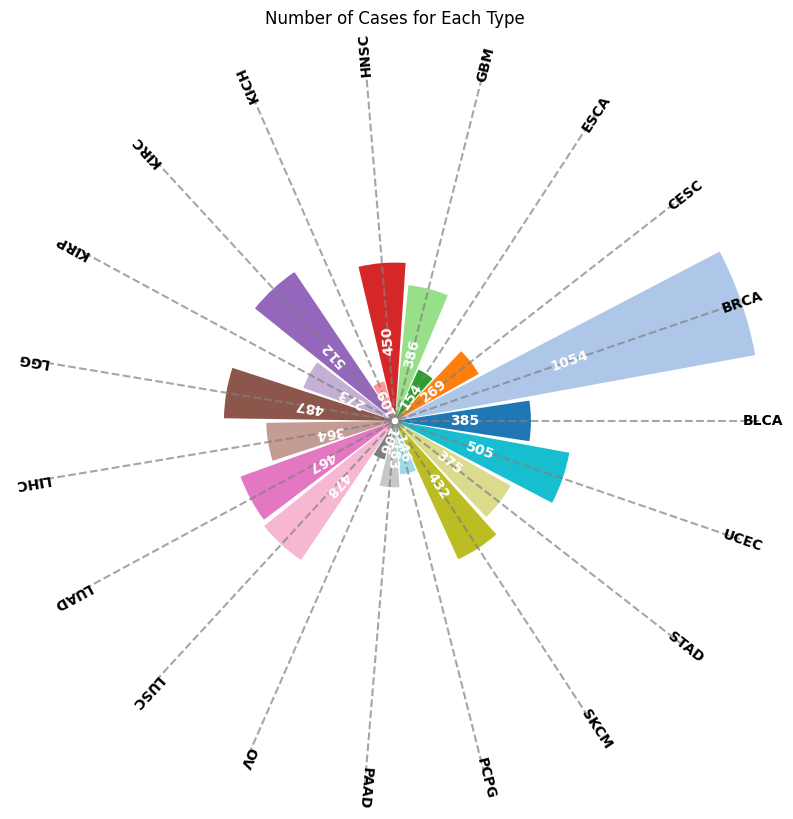

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import get_colors_dict

# Load the CSV file
df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv')

# Filter the rows where 'type' is in the specified list
types_to_include = ['BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 
                    'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV', 'PAAD', 'SKCM', 'STAD', 'UCEC', 'PCPG']
filtered_df = df[df['type'].isin(types_to_include)]

# Count the number of cases for each type
type_counts = filtered_df['type'].value_counts().sort_index()
# type_counts = filtered_df['type'].value_counts().sort_values()

# Get the colors dictionary
colors_dict = get_colors_dict()

# Plotting the circular bar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
theta = np.linspace(0.0, 2 * np.pi, len(type_counts), endpoint=False)
radii = type_counts.values
bottom = 10  # Adjust this value to create the hollow center effect

bars = ax.bar(theta, radii, width=0.3, bottom=bottom, color=[colors_dict[t] for t in type_counts.index])

# Add grid lines for each bar and labels at the outer edge
for bar, (angle, label, count) in zip(bars, zip(theta, type_counts.index, radii)):
    rotation = np.degrees(angle)
    alignment = 'center'
    x_pos = angle
    y_pos = bottom + bar.get_height() / 2

    # Add the count inside the bar
    ax.text(x_pos, y_pos, f'{int(count)}', ha=alignment, va='center', rotation=rotation,
            rotation_mode='anchor', color='white', fontsize=10, weight='bold')

    # Add the type label at the outer edge
    outer_y_pos = bottom + max(radii) + 5  # Adjust the 5 to control distance from outer circle
    ax.text(x_pos, outer_y_pos, label, ha=alignment, va='center', rotation=rotation,
            rotation_mode='anchor', fontsize=10, weight='bold')

    # Add grid lines extending outward from each bar
    ax.plot([angle, angle], [bottom, bottom + max(radii) + 2], linestyle='--', color='grey', alpha=0.7)

# Customize the polar plot
ax.spines['polar'].set_visible(False)  # Hide the outer circular box

# Remove the circular grid and y-ticks
ax.grid(False)
ax.set_yticklabels([])

# Remove the inner radial ticks
ax.xaxis.set_visible(False)

# Set the background color
ax.set_facecolor('white')

# Set the title
plt.title('Number of Cases for Each Type', va='bottom')

plt.show()

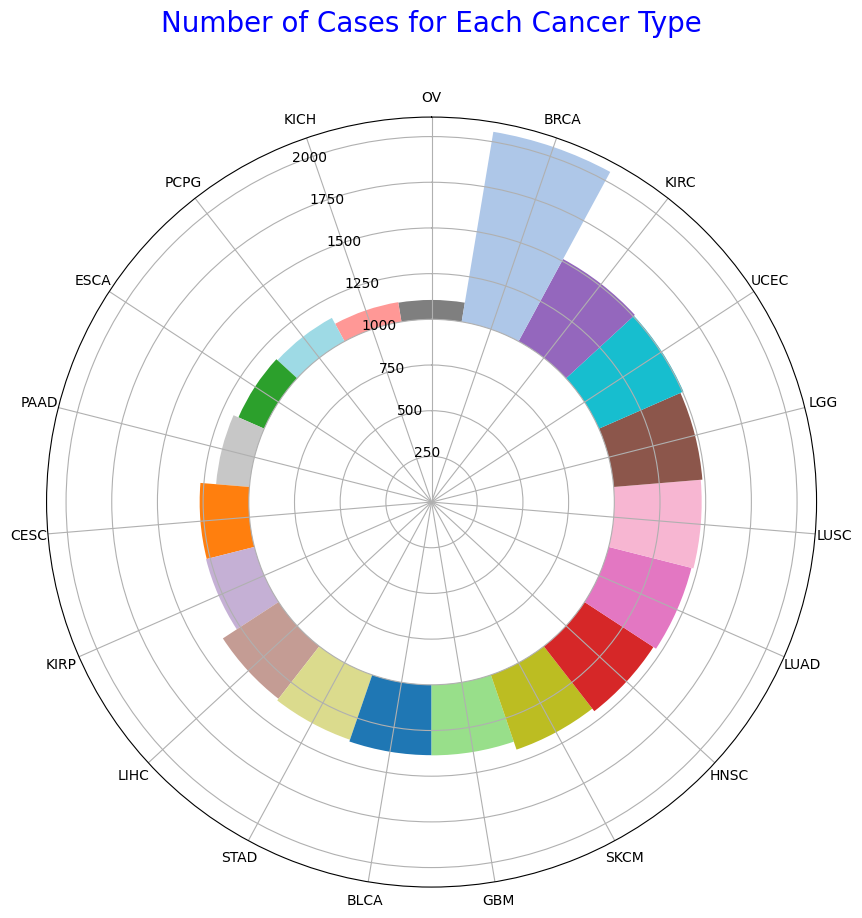

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import get_colors_dict

# Load the CSV file
df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv')

cancer_groups = {
    "Carcinomas": ["BLCA", "BRCA", "CESC", "COADREAD", "ESCA", "HNSC", "KIRC", "KIRP", "LIHC", "LUAD", "LUSC", "OV", "PAAD", "SKCM", "STAD", "UCEC"],
    "Neurological Cancers": ["GBM", "LGG"],
    "Renal Cancers": ["KICH"],
    "Endocrine System Tumors": ["PCPG"]
}

# Filter the rows where 'type' is in the specified list
types_to_include = ['BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 
                    'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV', 'PAAD', 'SKCM', 'STAD', 'UCEC', 'PCPG']
filtered_df = df[df['type'].isin(types_to_include)]

# Count the number of cases for each type
# type_counts = filtered_df['type'].value_counts().sort_index()
type_counts = filtered_df['type'].value_counts().sort_values()

# Get the colors dictionary
colors_dict = get_colors_dict()
colors = [colors_dict[type] for type in type_counts.index]

# Create a radial bar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

# Number of bars
num_bars = len(type_counts)

# Compute the angles for each bar
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False)

# Compute the width of each bar (span of angle)
widths = 2 * np.pi / num_bars

# Plot each bar
bars = ax.bar(angles, type_counts, width=widths, bottom=1000, color=colors, edgecolor=None)

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(type_counts.index)

# Set the starting position of the bars to be at the top
ax.set_theta_zero_location('N')

# Add a title
plt.title('Number of Cases for Each Cancer Type', size=20, color='blue', y=1.1)

# Show the plot
plt.show()


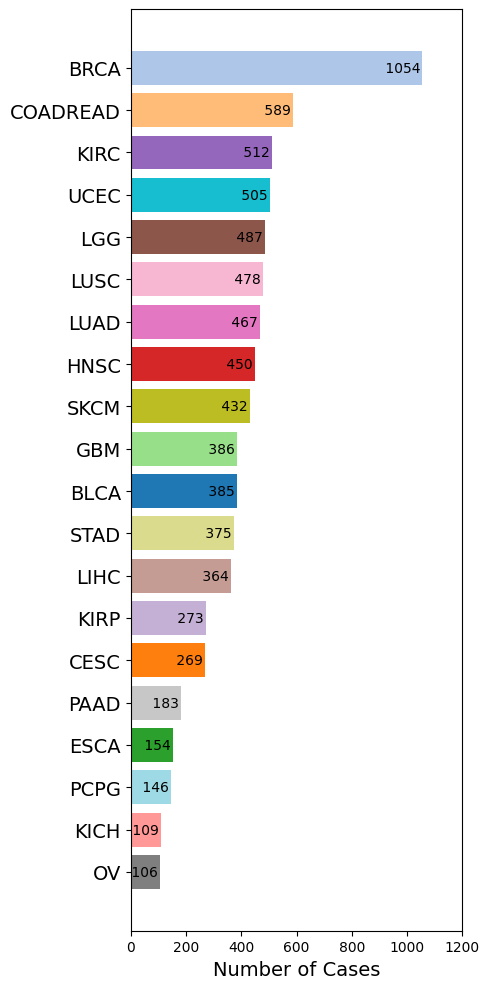

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import get_colors_dict

# Load the CSV file
df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv')
# Check and replace 'COAD' or 'READ' with 'COADREAD'
df['type'] = df['type'].replace(['COAD', 'READ'], 'COADREAD')

# Filter the rows where 'type' is in the specified list
types_to_include = ['BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 
                    'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV', 'PAAD', 'SKCM', 'STAD', 'UCEC', 'PCPG']
filtered_df = df[df['type'].isin(types_to_include)]

# Count the number of cases for each type
# type_counts = filtered_df['type'].value_counts().sort_index()
type_counts = filtered_df['type'].value_counts().sort_values()

# Create the horizontal bar plot
plt.figure(figsize=(5, 10))
bars  = plt.barh(type_counts.index, type_counts.values, color=[colors_dict.get(t, 'black') for t in type_counts.index])

for bar in bars:
    offset = 120 if bar.get_width()<1000 else 150
    plt.text(bar.get_width()-offset, bar.get_y() + bar.get_height()/2, 
             f' {bar.get_width():.0f}', 
             va='center', color='black')

# plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.xlabel('Number of Cases', fontsize=14)
plt.xlim([0, 1200])
# plt.title('Number of Cases for Each Type')
plt.tight_layout()
plt.show()


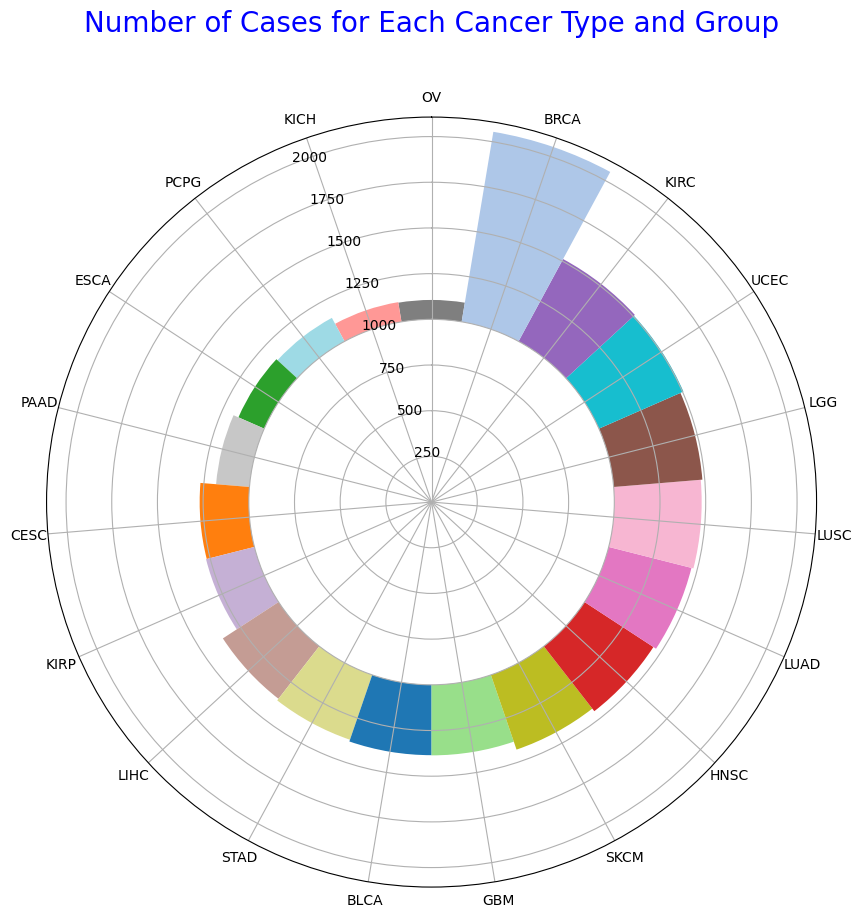

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import get_colors_dict

# Load the CSV file
df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv')

cell_type_origin = {
    "Carcinomas": ["BLCA", "BRCA", "CESC", "COADREAD", "ESCA", "HNSC", "LIHC", "LUAD", "LUSC", "OV", "PAAD", "STAD", "UCEC"],
    "Neural Cells": ["GBM", "LGG"],
    "Neuroendocrine Cells": ["PCPG"],
    "Melanocytes": ["SKCM"],
    "Renal Cells": ["KICH", "KIRC", "KIRP"]
}

histopathological_features = {
    "Adenocarcinomas": ["BRCA", "COADREAD", "LUAD", "PAAD", "STAD", "UCEC"],
    "Squamous Cell Carcinomas": ["CESC", "ESCA", "HNSC", "LUSC"],
    "Gliomas": ["GBM", "LGG"],
    "Renal Cells": ["KICH", "KIRC", "KIRP"],
    "Others": ["BLCA", "LIHC", "OV", "SKCM", "PCPG"]
}


# Add a new column for the cancer group
df['group'] = df['type'].map({cancer: group for group, cancers in cancer_groups.items() for cancer in cancers})

# Filter the rows where 'type' is in the specified list
types_to_include = list({cancer for group, cancers in cancer_groups.items() for cancer in cancers})
filtered_df = df[df['type'].isin(types_to_include)]

# Count the number of cases for each type and group
grouped_counts = filtered_df.groupby(['group', 'type']).size().sort_values()

# Get the colors dictionary
colors_dict = get_colors_dict()
colors = [colors_dict[type] for type in grouped_counts.index.get_level_values('type')]

# Create a radial bar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

# Number of bars
num_bars = len(grouped_counts)

# Compute the angles for each bar
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False)

# Compute the width of each bar (span of angle)
widths = 2 * np.pi / num_bars

# Plot each bar
bars = ax.bar(angles, grouped_counts, width=widths, bottom=1000, color=colors, edgecolor=None)

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(grouped_counts.index.get_level_values('type'))

# Set the starting position of the bars to be at the top
ax.set_theta_zero_location('N')

# Add a title
plt.title('Number of Cases for Each Cancer Type and Group', size=20, color='blue', y=1.1)

# Show the plot
plt.show()
